# Práctica MIV 2022
## Tratado y análisis de datos meteorologicos
### Dickinson Bedoya Perez

### Librerias a usar 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gdp
import ipywidgets as widgets
from IPython.display import clear_output
from datetime import date, datetime

### Funciones para usar

#### Calcular el valor medio de una columna de un dataframe

In [2]:
def calc_df_med(df, column, provincias):
    data = dict()
    for i in provincias:
        pr = df[df['Provincia'] == i]
        tmed = pr[column].mean()
        data.setdefault(i,tmed)
        
    return data

#### Calcular la estación a partir del dia, mes y año 

In [3]:
#dia del año en del rango de la estacion
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)


def get_season(dia,mes,anio):
    fecha = date(int(anio),int(mes),int(dia)).timetuple().tm_yday
    if(fecha in spring):
        return('primavera')
    elif(fecha in summer):
        return('verano')
    elif(fecha in fall):
        return('otoño')
    else:
        return('invierno')

### Principio de código

#### Coger todos los archivos CSV de la carpeta y formatearlos para generar un dataframe 
#### Despues de generar el DF, renombrar las columnas para poder usar esas columnas más fácil

In [4]:
list_dfs = []
files = os.listdir('CSV')
for file in files:
        tmp_df = pd.read_csv('CSV/'+file, delimiter=';')
        dia = file.split('-')[2].split('.')[0]
        mes = file.split('-')[1]
        anio = file.split('-')[0].split('Aemet')[1]
        tmp_df['dia'] = dia
        tmp_df['mes'] = mes
        tmp_df['anio'] = anio
        tmp_df['periodo'] = get_season(dia,mes,anio)
        list_dfs.append(tmp_df)

temperature_df = pd.concat(list_dfs)
temperature_df = temperature_df.rename(columns={'Temperatura máxima (ºC)':'tmax',
                                                'Temperatura mínima (ºC)':'tmin',
                                                'Temperatura media (ºC)':'tmed',
                                                'Precipitación 00-24h (mm)':'precipitacion24',
                                                'Precipitación 00-06h (mm)':'precipitacion06',
                                                'Precipitación 06-12h (mm)':'precipitacion0612',
                                                'Precipitación 12-18h (mm)':'precipitacion1218',
                                                'Racha (km/h)':'rachakmh',
                                                'Velocidad máxima (km/h)':'velmaxkmh'
                                               })

#### Tratar datos para quitar las horas en que se recogieron 

In [5]:
temperature_df["tmax"] = temperature_df["tmax"].astype("string")
temperature_df["tmax"] = temperature_df["tmax"].str.split().str[0]
temperature_df["tmax"] = pd.to_numeric(temperature_df["tmax"])

temperature_df["tmin"] = temperature_df["tmin"].astype("string")
temperature_df["tmin"] = temperature_df["tmin"].str.split().str[0]
temperature_df["tmin"] = pd.to_numeric(temperature_df["tmin"])

temperature_df["rachakmh"] = temperature_df["rachakmh"].astype("string")
temperature_df["rachakmh"] = temperature_df["rachakmh"].str.split().str[0]
temperature_df["rachakmh"] = pd.to_numeric(temperature_df["rachakmh"])

temperature_df["velmaxkmh"] = temperature_df["velmaxkmh"].astype("string")
temperature_df["velmaxkmh"] = temperature_df["velmaxkmh"].str.split().str[0]
temperature_df["velmaxkmh"] = pd.to_numeric(temperature_df["velmaxkmh"])
temperature_df

,Estación,Provincia,tmax,tmin,tmed,rachakmh,velmaxkmh,precipitacion24,precipitacion06,precipitacion0612,precipitacion1218,dia,mes,anio,periodo
0,Estaca de Bares,A Coruña,13.9,10.9,12.4,117.0,98.0,2.6,0.0,0.2,2.2,01,01,2018,invierno
1,As Pontes,A Coruña,12.3,7.8,10.1,NaN,NaN,0.0,0.0,0.0,0.0,01,01,2018,invierno
2,A Coruña,A Coruña,15.3,11.5,13.4,69.0,40.0,0.6,0.0,0.2,0.2,01,01,2018,invierno
3,A Coruña Aeropuerto,A Coruña,15.0,9.0,12.0,61.0,32.0,0.5,0.0,0.4,0.1,01,01,2018,invierno
4,"Carballo, Depuradora",A Coruña,14.1,11.2,12.7,NaN,NaN,5.0,0.0,1.2,3.6,01,01,2018,invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,"El Pinar, Depósito",Santa Cruz de Tenerife,23.0,18.0,20.5,37.0,17.0,2.4,0.0,0.6,1.2,31,08,2022,verano
806,"El Pinar, La Dehesa",Santa Cruz de Tenerife,26.1,19.7,22.9,57.0,34.0,0.8,0.0,0.0,0.0,31,08,2022,verano
807,"San Andrés, Valverde",Santa Cruz de Tenerife,22.5,17.1,19.8,49.0,31.0,1.6,0.0,0.4,0.8,31,08,2022,verano
808,Valverde,Santa Cruz de Tenerife,22.6,17.4,20.0,64.0,46.0,1.2,0.0,0.2,0.8,31,08,2022,verano


#### Coger solo los datos de tarragona en 2018 

In [6]:
tarragona_df = temperature_df[(temperature_df['Estación']=='Tarragona') & (temperature_df['anio']=='2018')]

#### Generar grafico con botones
#### Boton para: Temperatura máxima, mínima y/o media en 2018 en Tarragona
##### El gráfico muestra lo que ya sabíamos, en verano las temperaturas aumentan

Temperatura máxima: 38.1°C
Temperatura mínima: -0.1°C
Temperatura media: 17.77265193370166°C


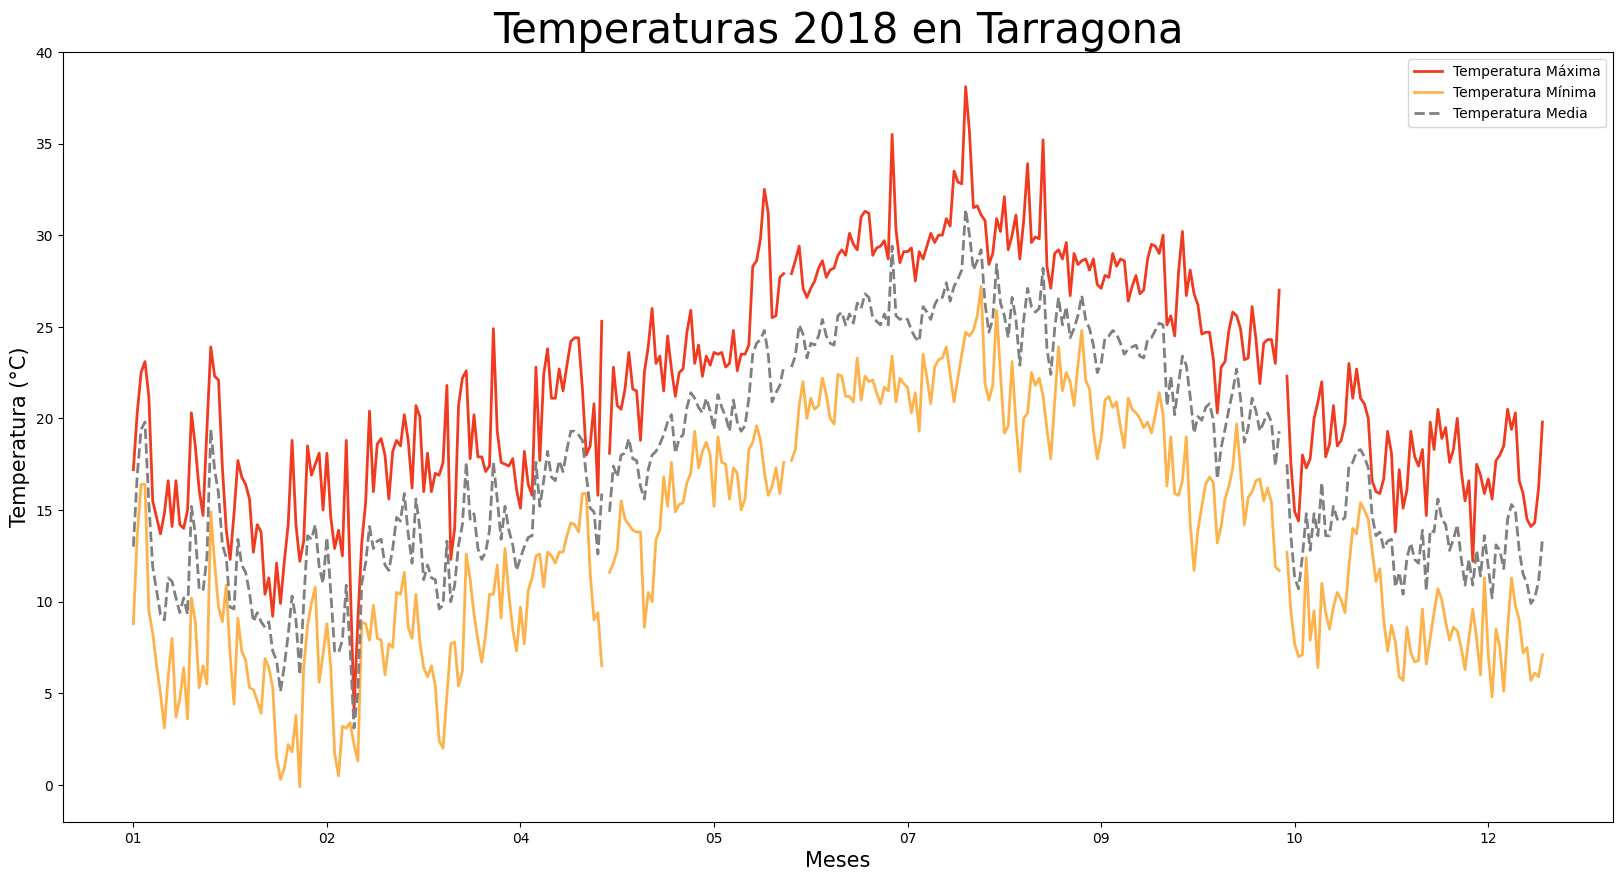

In [7]:
btn1 = widgets.Button(description="Temperatura maxima")
btn2 = widgets.Button(description="Temperatura minima")
btn3 = widgets.Button(description="Temperatura media")
btn4 = widgets.Button(description="Completo")
btn5 = widgets.Button(description="Borrar")
out = widgets.Output()

buttons = widgets.VBox(children=[btn1, btn2, btn3, btn4, btn5])
all_widgets = widgets.HBox(children=[buttons, out])
display(all_widgets)

def log21(b):
    clear_output()
    ax = plt.gca()

    tarragona_df.plot(figsize=(20,10),kind='line',x='mes',y='tmax', color = '#f03b20', ax = ax, linewidth=2, label='Temperatura Máxima')
    plt.ylabel('Temperatura (°C)', fontsize=15)
    plt.xlabel('Meses', fontsize=15)
    plt.title('Temperaturas 2018 en Tarragona', fontsize=30)
    print('Temperatura máxima: '+str(tarragona_df['tmax'].max())+'°C')
    display(all_widgets)

def log18(b):
    clear_output()
    ax = plt.gca()

    tarragona_df.plot(figsize=(20,10),kind='line',x='mes',y='tmin',color='#feb24c', ax = ax, linewidth=2, label='Temperatura Mínima')
    plt.ylabel('Temperatura (°C)', fontsize=15)
    plt.xlabel('Meses', fontsize=15)
    plt.title('Temperaturas 2018 en Tarragona', fontsize=30)
    print('Temperatura mínima: '+str(tarragona_df['tmin'].min())+'°C')
    display(all_widgets)

def logmed(b):
    clear_output()
    ax = plt.gca()

    tarragona_df.plot(figsize=(20,10),kind='line',x='mes',y='tmed',color='gray', ax = ax, linewidth=2, linestyle='--', label='Temperatura Media')
    plt.ylabel('Temperatura (°C)', fontsize=15)
    plt.xlabel('Meses', fontsize=15)
    plt.title('Temperaturas 2018 en Tarragona', fontsize=30)
    print('Temperatura media: '+str(tarragona_df['tmed'].mean())+'°C')
    display(all_widgets)

def todo(b):
    clear_output()
    ax = plt.gca()

    tarragona_df.plot(figsize=(20,10),kind='line',x='mes',y='tmax', color = '#f03b20', ax = ax, linewidth=2, label='Temperatura Máxima')
    tarragona_df.plot(kind='line',x='mes',y='tmin',color='#feb24c', ax = ax, linewidth=2, label='Temperatura Mínima')
    tarragona_df.plot(kind='line',x='mes',y='tmed',color='gray', ax = ax, linewidth=2, linestyle='--', label='Temperatura Media')
    plt.ylabel('Temperatura (°C)', fontsize=15)
    plt.xlabel('Meses', fontsize=15)
    plt.title('Temperaturas 2018 en Tarragona', fontsize=30)
    print('Temperatura máxima: '+str(tarragona_df['tmax'].max())+'°C')
    print('Temperatura mínima: '+str(tarragona_df['tmin'].min())+'°C')
    print('Temperatura media: '+str(tarragona_df['tmed'].mean())+'°C')
    display(all_widgets)


def clear(b):
    clear_output()
    display(all_widgets)
    

btn1.on_click(log21)
btn2.on_click(log18)
btn3.on_click(logmed)
btn4.on_click(todo)
btn5.on_click(clear)

with out:
    print('')

#### Coger solo los datos en Tarragona 2021 ya que los de 2022 no estan completos

In [8]:
tgn21 = temperature_df[(temperature_df['Estación']=='Tarragona') & (temperature_df['anio']=='2021')]

#### Generar gráfico donde se comparan las precipitaciones entre 2018 y 2021 en Tarragona 
##### El gráfico muestra que en los meses que cae otoño hay una cantidad de precipitaciones más alta, aunque a medida que han  pasado los años ha disminuido la canitdad de lluvia

Text(0.5, 1.0, 'Variacion de precipitaciones en Tarragona (2018 - 2021)')

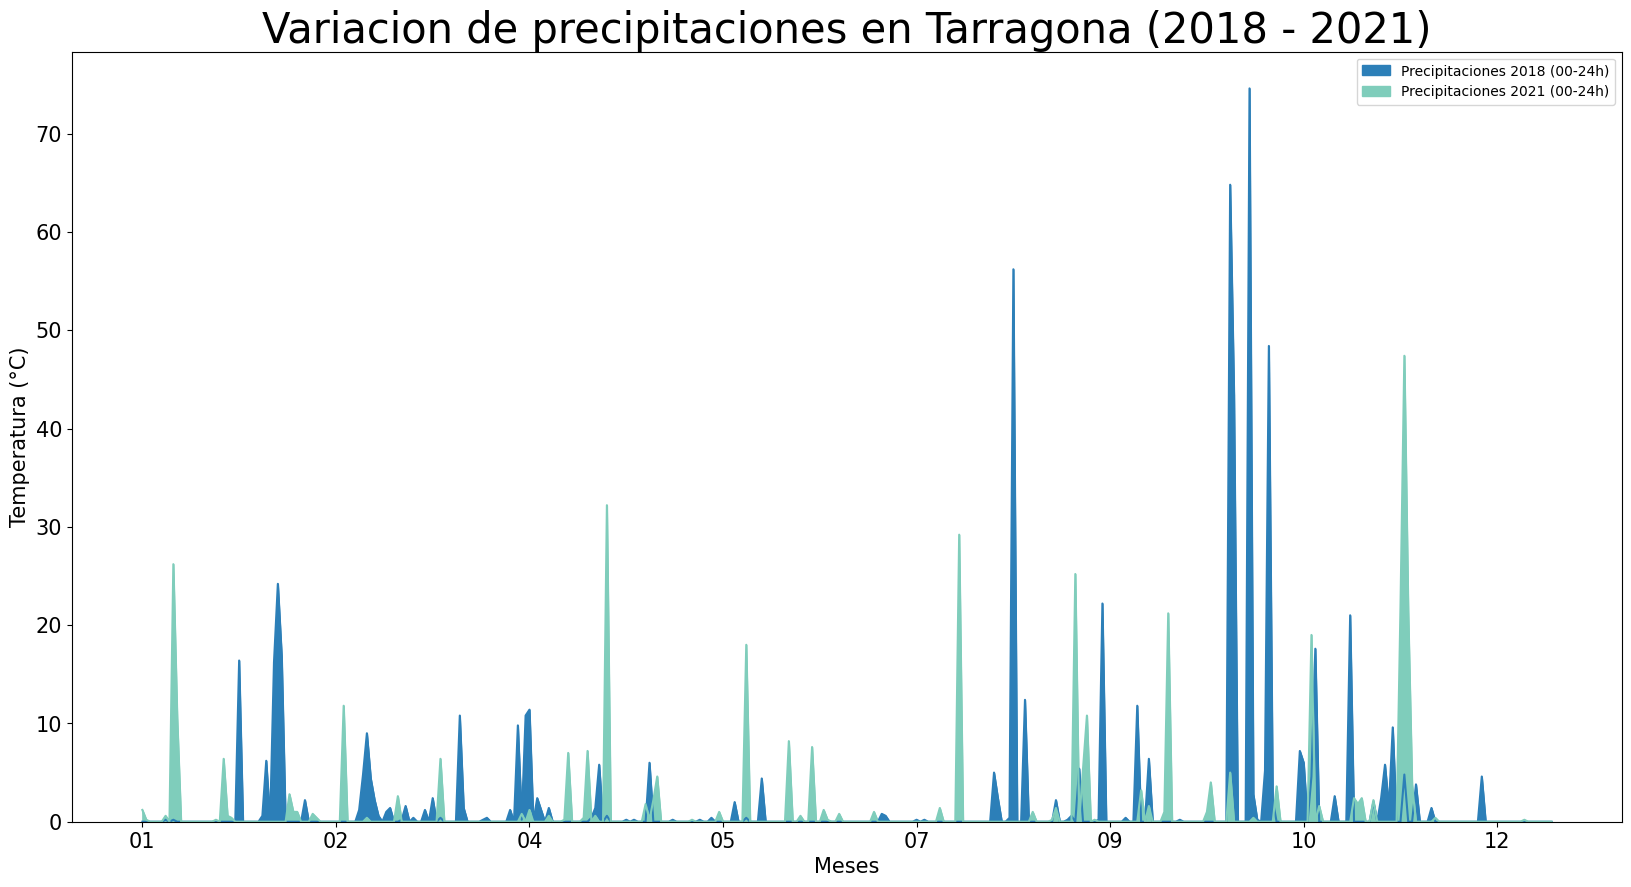

In [9]:
ax = plt.gca()

tarragona_df.plot(figsize=(20,10),kind='area',x='mes',y='precipitacion24', color = '#2c7fb8', label='Precipitaciones 2018 (00-24h)', ax = ax, fontsize=15)
tgn21.plot(kind='area',x='mes',y='precipitacion24',color='#7fcdbb', ax = ax, label='Precipitaciones 2021 (00-24h)', fontsize=15)
plt.ylabel('Temperatura (°C)', fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.title('Variacion de precipitaciones en Tarragona (2018 - 2021)', fontsize=30)

#### Generar gráfico para comparar la temperatura y las precipitaciones entre 2018 y 2021 en Tarragona
##### En el gráfico se ve que en 2021 disminuyen las precipitaciones entre los meses de Septiembre y Octubre pero se incrementan en Noviembre, por lo que se entiende que las lluvias se retrasan un mes. Además la temperatura en 2021, en los meses de otoño es un poco mas caluroso que en 2018

Text(0.5, 1.0, 'Variacion de precipitaciones y temperaturas en Tarragona (2018 - 2021)')

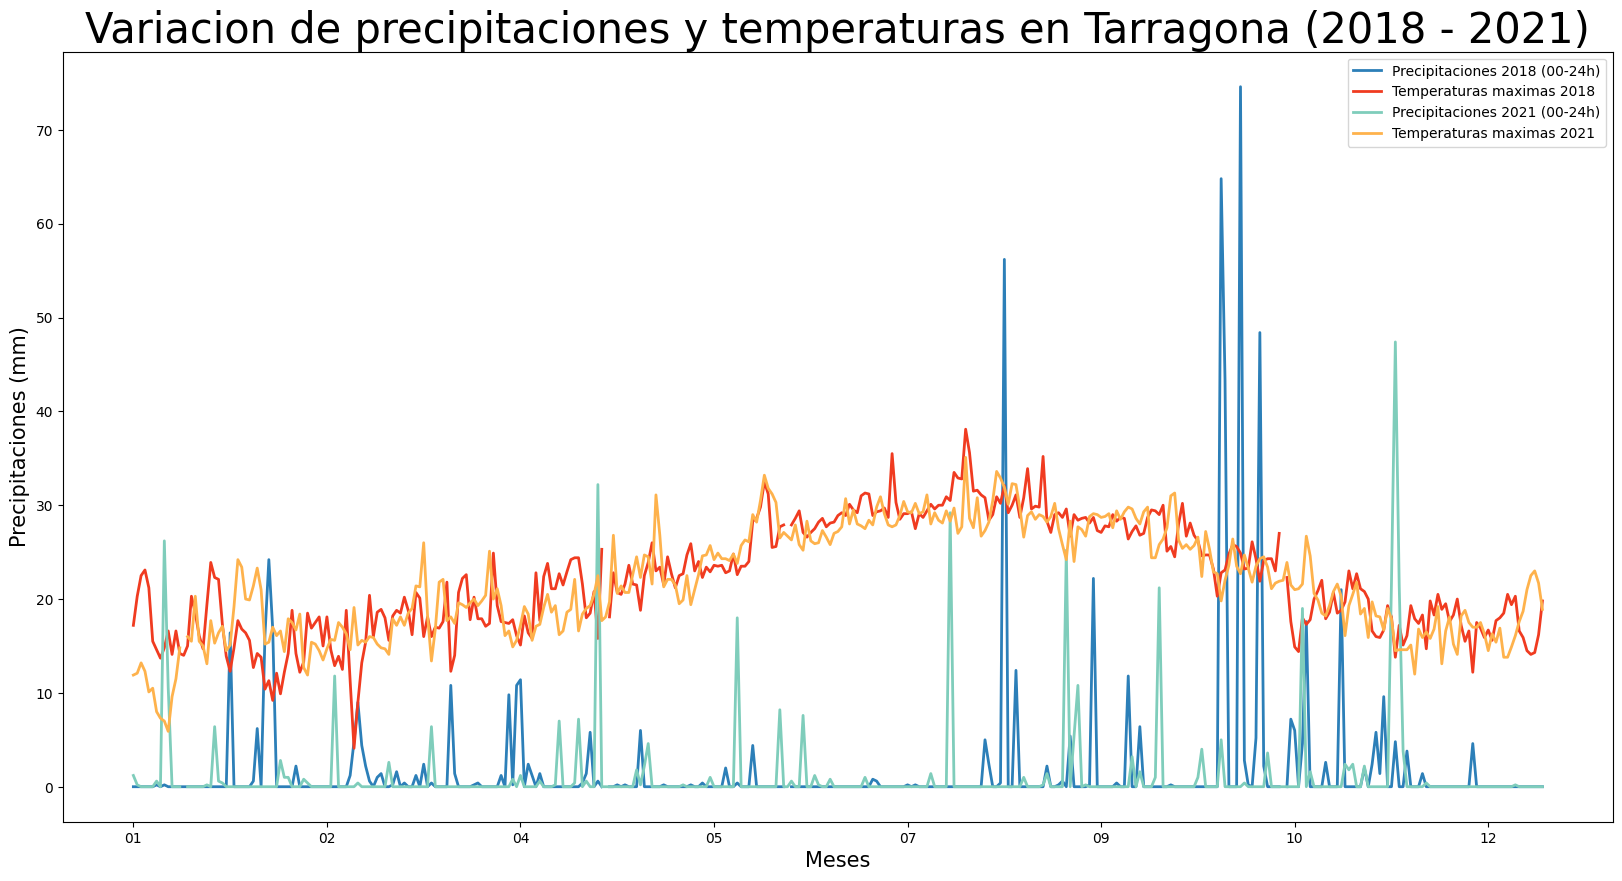

In [10]:
#generar graficos a partir de los datos
ax = plt.gca()

tarragona_df.plot(figsize=(20,10),kind='line',x='mes',y='precipitacion24', color='#2c7fb8', ax = ax, linewidth=2, label='Precipitaciones 2018 (00-24h)')
tarragona_df.plot(figsize=(20,10),kind='line',x='mes',y='tmax', color='#f03b20', ax = ax, linewidth=2, label='Temperaturas maximas 2018')

tgn21.plot(kind='line',x='mes',y='precipitacion24', ax = ax, color='#7fcdbb', linewidth=2, label='Precipitaciones 2021 (00-24h)')
tgn21.plot(kind='line',x='mes',y='tmax',  ax = ax, color='#feb24c',  linewidth=2, label='Temperaturas maximas 2021')


plt.ylabel('Precipitaciones (mm)', fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.title('Variacion de precipitaciones y temperaturas en Tarragona (2018 - 2021)', fontsize=30)

#### Coger datos de España de 2018 y 2021 

In [11]:
sp18 = temperature_df[temperature_df['anio'] == '2018']
sp21 = temperature_df[temperature_df['anio'] == '2021']

#### Generar lista de las provincias

In [12]:
prov = temperature_df.loc[:,'Provincia']
provincias = []
for i in prov:
    if(i not in provincias):
        provincias.append(i)

#### Generar dataframes de la temperatura media y las precipitaciones de cada provincia de España

In [13]:
data18 = calc_df_med(sp18,'tmed',provincias)
data21 = calc_df_med(sp21,'tmed',provincias)
temp18 = pd.DataFrame({'Provincia':data18.keys(), 'tmed':data18.values()})
temp21 = pd.DataFrame({'Provincia':data21.keys(), 'tmed':data21.values()})

tmp18 = calc_df_med(sp18,'precipitacion24',provincias)
tmp21 = calc_df_med(sp21,'precipitacion24',provincias)
l_2018 = pd.DataFrame({'Provincia':tmp18.keys(), 'precipitacion24':tmp18.values()})
l_2021 = pd.DataFrame({'Provincia':tmp21.keys(), 'precipitacion24':tmp21.values()})

#### Leer archivo GeoJson que tiene los datos para poder dibujar el mapa de España y hacer un "merge" con los datos metereologicos

In [14]:
#read GeoJson for a map
provincias_sp = gdp.read_file("provincias-espanolas.geojson", encoding='utf-8')
provincias_sp = provincias_sp.rename(columns={"provincia":"Provincia"})

#merge temperature data with the map
provincias_sp_2018 = provincias_sp.merge(l_2018, on="Provincia")
provincias_sp_2021 = provincias_sp.merge(l_2021, on="Provincia")

#### Generar gráfico con botones que compara las precipitaciones en 2018 y en 2021
##### En el gráfico que se comparan los dos mapas, se nota que en 2021 ha disminuido las precipitaciones

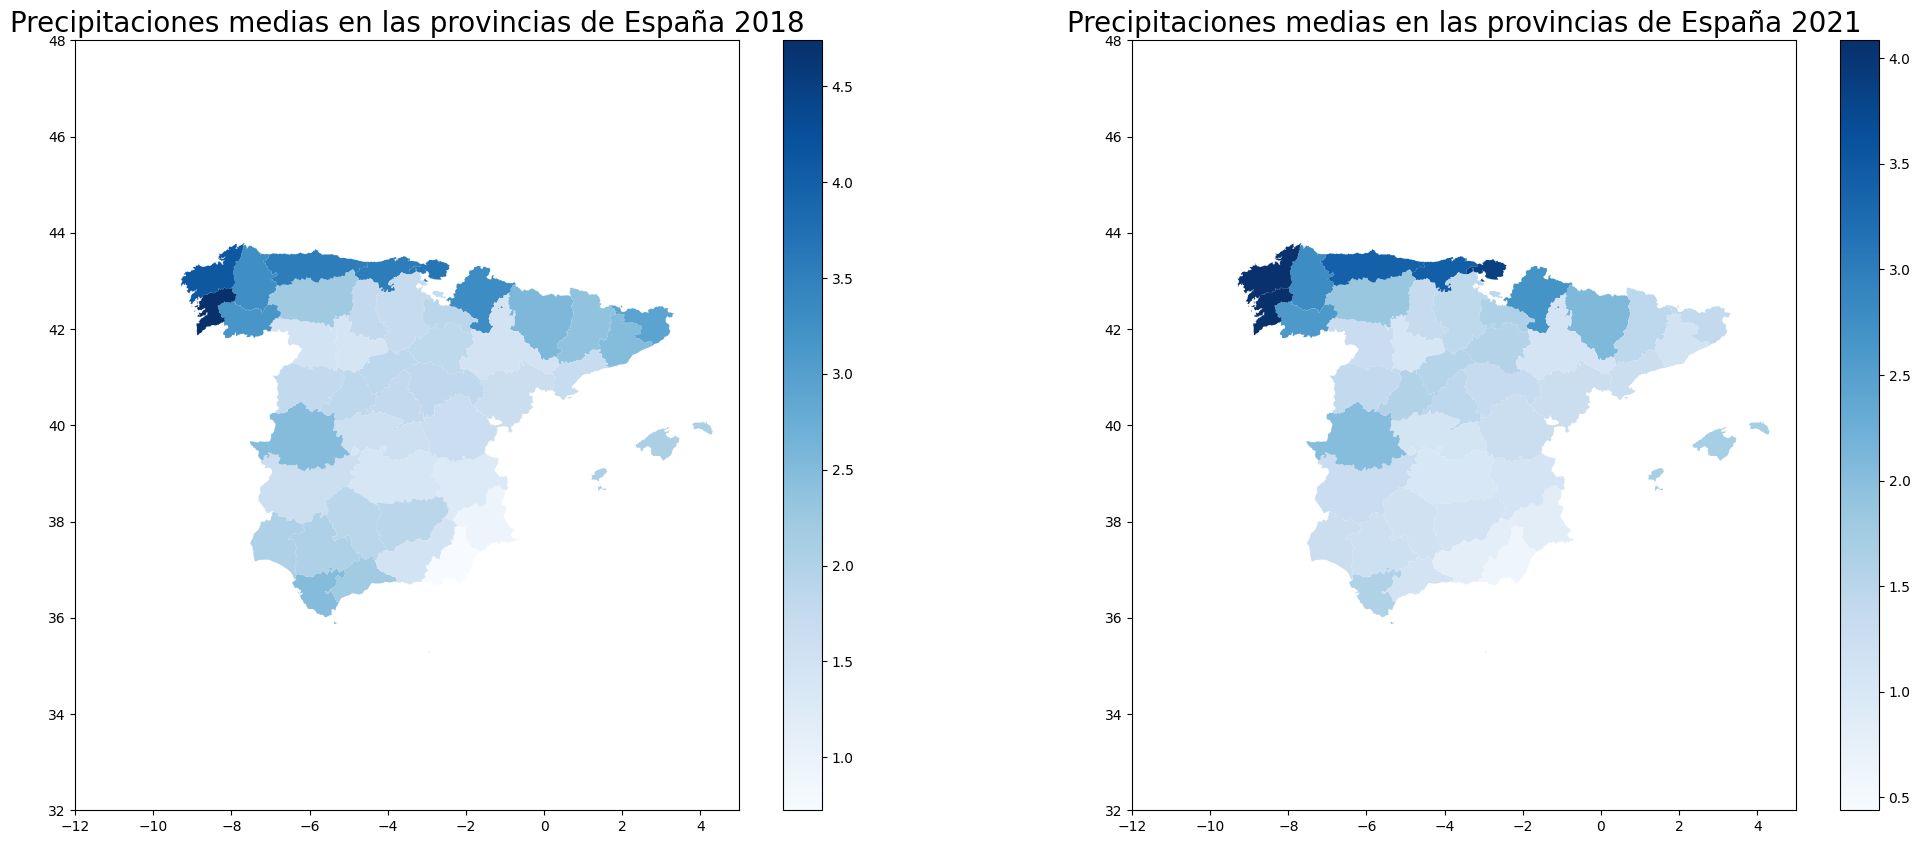

In [18]:
button1 = widgets.Button(description="Precipitaciones 2021")
button2 = widgets.Button(description="Precipitaciones 2018")
button3 = widgets.Button(description="Comparar")
button4 = widgets.Button(description="Borrar")
out = widgets.Output()

buttons = widgets.VBox(children=[button1, button2, button3, button4])
all_widgets = widgets.HBox(children=[buttons, out])
display(all_widgets)

def log21(b):
    clear_output()
    ax = plt.gca()
    ax.axis([-12, 5, 32, 48])
    ax.set_title('Precipitaciones medias en las provincias de España 2021', fontsize=10)
    provincias_sp_2021.plot(column='precipitacion24', cmap='Blues', ax=ax, zorder=5, legend = True)
    display(all_widgets)

def log18(b):
    clear_output()
    ax = plt.gca()
    ax.axis([-12, 5, 32, 48])
    ax.set_title('Precipitaciones medias en las provincias de España 2018', fontsize=10)
    provincias_sp_2018.plot(column='precipitacion24', cmap='Blues', ax=ax, zorder=5, legend = True)
    display(all_widgets)

def compare(b):
    clear_output()
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(25,10))

    axes[0].axis([-12, 5, 32, 48])
    axes[1].axis([-12, 5, 32, 48])
    
    axes[0].set_title('Precipitaciones medias en las provincias de España 2018', fontsize=20)
    axes[1].set_title('Precipitaciones medias en las provincias de España 2021', fontsize=20)
    provincias_sp_2018.plot(column='precipitacion24', cmap='Blues', ax=axes[0], zorder=5, legend = True)
    provincias_sp_2021.plot(column='precipitacion24', cmap='Blues', ax=axes[1], zorder=5, legend = True)

    display(all_widgets)

    
def clear(b):
    clear_output()
    display(all_widgets)
    
button1.on_click(log21)
button2.on_click(log18)
button3.on_click(compare)
button4.on_click(clear)

with out:
    print('')

#### Generar dataframes por cada estación 

In [16]:
pri18 = sp18[sp18['periodo'] == 'primavera']
pri21 = sp21[sp21['periodo'] == 'primavera']

pr18 = calc_df_med(pri18,'tmed',provincias)
pr21 = calc_df_med(pri21,'tmed',provincias)

primavera18 = pd.DataFrame({'Provincia':pr18.keys(), 'tmed':pr18.values()})
primavera21 = pd.DataFrame({'Provincia':pr21.keys(), 'tmed':pr21.values()})


ver18 = sp18[sp18['periodo'] == 'verano']
ver21 = sp21[sp21['periodo'] == 'verano']

vr18 = calc_df_med(ver18,'tmed',provincias)
vr21 = calc_df_med(ver21,'tmed',provincias)

verano18 = pd.DataFrame({'Provincia':vr18.keys(), 'tmed':vr18.values()})
verano21 = pd.DataFrame({'Provincia':vr21.keys(), 'tmed':vr21.values()})

oto18 = sp18[sp18['periodo'] == 'otoño']
oto21 = sp21[sp21['periodo'] == 'otoño']

ot18 = calc_df_med(oto18,'tmed',provincias)
ot21 = calc_df_med(oto21,'tmed',provincias)

otono18 = pd.DataFrame({'Provincia':ot18.keys(), 'tmed':ot18.values()})
otono21 = pd.DataFrame({'Provincia':ot21.keys(), 'tmed':ot21.values()})

inv18 = sp18[sp18['periodo'] == 'invierno']
inv21 = sp21[sp21['periodo'] == 'invierno']

in18 = calc_df_med(inv18,'tmed',provincias)
in21 = calc_df_med(inv21,'tmed',provincias)

invierno18 = pd.DataFrame({'Provincia':in18.keys(), 'tmed':in18.values()})
invierno21 = pd.DataFrame({'Provincia':in21.keys(), 'tmed':in21.values()})

#### Generar gráfico que compara las temperaturas medias de cada estación entre 2018 y 2021
##### Aunque hizo mas calor en primavera y verano de 2018, las temperaturas fueron más altas en el otoño e invierno de 2021

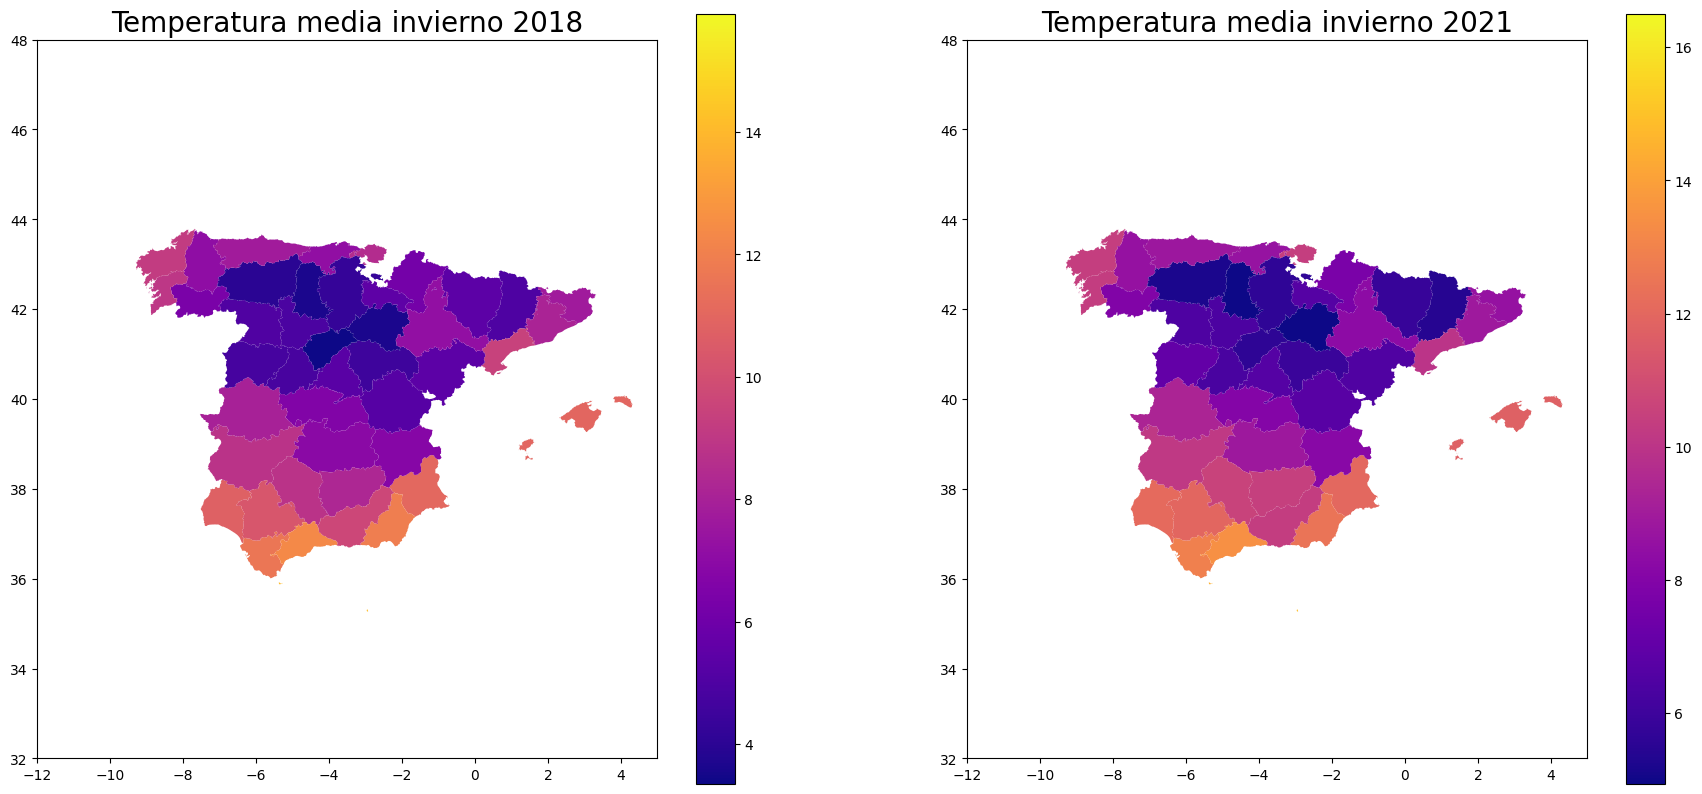

In [19]:
b1 = widgets.Button(description="Primavera")
b2 = widgets.Button(description="Verano")
b3 = widgets.Button(description="Otoño")
b4 = widgets.Button(description="Invierno")
b5 = widgets.Button(description="Borrar")
out = widgets.Output()

buttons = widgets.VBox(children=[b1, b2, b3, b4, b5])
all_widgets = widgets.HBox(children=[buttons, out])
display(all_widgets)

def primavera(b):
    clear_output()
    
    provincias_sp = gdp.read_file("provincias-espanolas.geojson", encoding='utf-8')
    provincias_sp = provincias_sp.rename(columns={"provincia":"Provincia"})
    
    provincias_sp_2018 = provincias_sp.merge(primavera18, on="Provincia")
    provincias_sp_2021 = provincias_sp.merge(primavera21, on="Provincia")
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(22,10))

    axes[0].axis([-12, 5, 32, 48])
    axes[1].axis([-12, 5, 32, 48])
    
    axes[0].set_title('Temperatura media primavera 2018', fontsize=20)
    axes[1].set_title('Temperatura media primavera 2021', fontsize=20)
    provincias_sp_2018.plot(column='tmed', cmap='plasma', ax=axes[0], zorder=5, legend = True)
    provincias_sp_2021.plot(column='tmed', cmap='plasma', ax=axes[1], zorder=5, legend = True)

    display(all_widgets)

def verano(b):
    clear_output()
    
    provincias_sp = gdp.read_file("provincias-espanolas.geojson", encoding='utf-8')
    provincias_sp = provincias_sp.rename(columns={"provincia":"Provincia"})
    
    provincias_sp_2018 = provincias_sp.merge(verano18, on="Provincia")
    provincias_sp_2021 = provincias_sp.merge(verano21, on="Provincia")
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(22,10))

    axes[0].axis([-12, 5, 32, 48])
    axes[1].axis([-12, 5, 32, 48])
    
    axes[0].set_title('Temperatura media verano 2018', fontsize=20)
    axes[1].set_title('Temperatura media verano 2021', fontsize=20)
    provincias_sp_2018.plot(column='tmed', cmap='plasma', ax=axes[0], zorder=5, legend = True)
    provincias_sp_2021.plot(column='tmed', cmap='plasma', ax=axes[1], zorder=5, legend = True)

    display(all_widgets)

def otono(b):
    clear_output()
    
    provincias_sp = gdp.read_file("provincias-espanolas.geojson", encoding='utf-8')
    provincias_sp = provincias_sp.rename(columns={"provincia":"Provincia"})
    
    provincias_sp_2018 = provincias_sp.merge(otono18, on="Provincia")
    provincias_sp_2021 = provincias_sp.merge(otono21, on="Provincia")
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(22,10))

    axes[0].axis([-12, 5, 32, 48])
    axes[1].axis([-12, 5, 32, 48])
    
    axes[0].set_title('Temperatura media otoño 2018', fontsize=20)
    axes[1].set_title('Temperatura media otoño 2021', fontsize=20)
    provincias_sp_2018.plot(column='tmed', cmap='plasma', ax=axes[0], zorder=5, legend = True)
    provincias_sp_2021.plot(column='tmed', cmap='plasma', ax=axes[1], zorder=5, legend = True)

    display(all_widgets)

    
def invierno(b):
    clear_output()
    
    provincias_sp = gdp.read_file("provincias-espanolas.geojson", encoding='utf-8')
    provincias_sp = provincias_sp.rename(columns={"provincia":"Provincia"})
    
    provincias_sp_2018 = provincias_sp.merge(invierno18, on="Provincia")
    provincias_sp_2021 = provincias_sp.merge(invierno21, on="Provincia")
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(22,10))
    
    axes[0].axis([-12, 5, 32, 48])
    axes[1].axis([-12, 5, 32, 48])
    
    axes[0].set_title('Temperatura media invierno 2018', fontsize=20)
    axes[1].set_title('Temperatura media invierno 2021', fontsize=20)
    
    provincias_sp_2018.plot(column='tmed', cmap='plasma', ax=axes[0], zorder=5, legend = True)
    provincias_sp_2021.plot(column='tmed', cmap='plasma', ax=axes[1], zorder=5, legend = True)

    display(all_widgets)
    
    

def clear(b):
    clear_output()
    display(all_widgets)
    
b1.on_click(primavera)
b2.on_click(verano)
b3.on_click(otono)
b4.on_click(invierno)
b5.on_click(clear)

with out:
    print('')